# Computer-Aided Musicology
## From Pythagoras to the Diatonic Scale
<br>



<div align="center">
<img src="./img/pythas.png" width="500px" alt="Pytha1" align="center" >

</div>
<div align="center">
<img src="./img/businesscard.jpg" width="200px" alt="Business Card" align="left" >
</div>
<br>



[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com



In [1]:
# https://en.wikipedia.org/wiki/Pythagoras#/media/File:Kapitolinischer_Pythagoras_adjusted.jpg
# https://en.wikipedia.org/wiki/File:Gaffurio_Pythagoras.png

# Imports

In [2]:
#Imports 
from music21 import *
from IPython.display import Image
import sympy as sp
from sympy import init_printing
from sympy.abc import mu
from sympy import symbols, sqrt
from librosa import hz_to_note, note_to_hz

# Sympy Initial Config
init_printing()

# Auxiliary Function to Display Musical Score
def get_score_png():
    filename = ! ls *.png -Art | tail -n 1
    return(filename[0])

## String Vibration

In [3]:
# Define Symbols
f, f1, f2, L, L1, L2,T,mu = symbols('f f1 f2 L L1 L2 T mu')

In [4]:
# Define Equation
Eq=sp.Eq(f,((1/(2*L))*sqrt(T/mu)))

### String Vibration Equation
 
 
$ \text{ f = fundamental frequency } $
<br>
$ \text{ L = string length } $
<br>
$ \text{ f = fundamental frequency } $
<br>
$ \text{ T = Tension of the string } $
<br>
$ \text{ $\mu$ = linear density (mass per unit length) } $
<br>


### {{Eq}}

In [5]:
# Two differernt lenghts
Eq1=sp.Eq(f1,((1/(2*L1))*sqrt(T/mu)))
Eq2=sp.Eq(f2,((1/(2*L2))*sqrt(T/mu)))

{{Eq1}}  
{{Eq2}}


In [6]:
# String Length Ratis
Eq3=sp.Eq(Eq1.lhs/Eq2.lhs,Eq1.rhs/Eq2.rhs)

## Strings Length Ratio
### {{Eq3}}

In [7]:
Eq4=sp.Eq(f1,sp.solve(Eq3,f1)[0])

### {{Eq4}}

## Ratio 2:1 - Octave

In [8]:
D3_freq=note_to_hz('D3')
print(D3_freq)

146.8323839587038


In [9]:
new_freq=Eq4.subs({L2:2,L1:1,f2:D3_freq })
new_note=hz_to_note(float(new_freq.rhs))
print(new_note)

D4


## Ratio 3:2 -  Perfect Fifth

In [10]:
new_freq=Eq4.subs({L2:3,L1:2,f2:D3_freq })
new_note=hz_to_note(float(new_freq.rhs))
print(new_note)

A3


## Pythagoras Experiments with 3:2 Ratios - Perfect Fifths

In [11]:
# Function to Calculate Perfect Fifths Intervals Forward and Backwars inside one octave
def test_scale(pitch1):
    pitch2=pitch1.transpose(12)
    pitches_list=[note.Note(pitch1)]
    i = interval.Interval('p5')
    new_pitch_forward=pitch1
    new_pitch_backward=pitch1
    for j in range(6):
        #Forward
        new_pitch_forward=i.transposePitch(new_pitch_forward)
        if new_pitch_forward.frequency  > pitch2.frequency:
            new_pitch_forward=new_pitch_forward.transpose(-12)
        if new_pitch_forward.frequency  < pitch1.frequency:
            new_pitch_forward=new_pitch_forward.transpose(12)
        pitches_list.append(note.Note(new_pitch_forward))
        #Backward
        new_pitch_backward=i.reverse().transposePitch(new_pitch_backward)
        if new_pitch_backward.frequency  > pitch2.frequency:
            new_pitch_backward=new_pitch_backward.transpose(-12)
        if new_pitch_backward.frequency  < pitch1.frequency:
            new_pitch_backward=new_pitch_backward.transpose(12)
        pitches_list.append(note.Note(new_pitch_backward))
        
    return pitches_list
    
    

In [12]:
pythagoras_scale=test_scale(pitch.Pitch('D3'))
pythagoras_scale

[<music21.note.Note D>,
 <music21.note.Note A>,
 <music21.note.Note G>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note F>,
 <music21.note.Note F#>,
 <music21.note.Note B->,
 <music21.note.Note C#>,
 <music21.note.Note E->,
 <music21.note.Note G#>,
 <music21.note.Note G#>]

In [13]:
s=stream.Stream()
penta_freq_list=[]
for notes in pythagoras_scale[:5]:
    penta_freq_list.append(notes.pitch.frequency)

In [14]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z 

In [15]:
penta_sorted_list=sort_list(pythagoras_scale,penta_freq_list)
print(penta_sorted_list)

[<music21.note.Note D>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note C>]


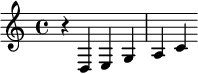

In [16]:
s.append(note.Rest('whole'))
s.append(penta_sorted_list)
s.show('lily.png')
Image(get_score_png())

In [17]:
s.show('midi')

In [18]:
diatonic_freq_list=[]
for notes in pythagoras_scale[:7]:
    diatonic_freq_list.append(notes.pitch.frequency)
sorted_diatonic=sort_list(pythagoras_scale,diatonic_freq_list)
print(sorted_diatonic)

[<music21.note.Note D>, <music21.note.Note E>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note B>, <music21.note.Note C>]


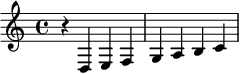

In [19]:
s1=stream.Stream()
s1.append(note.Rest('whole'))
s1.append(sorted_diatonic)
s1.show('lily.png')
Image(get_score_png())

In [20]:
s1.show('midi')

In [21]:
chromatic_freq_list=[]
for notes in pythagoras_scale[:12]:
    chromatic_freq_list.append(notes.pitch.frequency)
sorted_chromatic=sort_list(pythagoras_scale,chromatic_freq_list)
print(sorted_chromatic)

[<music21.note.Note D>, <music21.note.Note E->, <music21.note.Note E>, <music21.note.Note F>, <music21.note.Note F#>, <music21.note.Note G>, <music21.note.Note G#>, <music21.note.Note A>, <music21.note.Note B->, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note C#>]


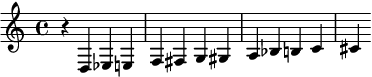

In [22]:
s2=stream.Stream()
s2.append(note.Rest('whole'))
s2.append(sorted_chromatic)
s2.show('lily.png')
Image(get_score_png())

In [23]:
s2.show('midi')